In [18]:
import pandas as pd

df = pd.read_csv(r"C:\Users\user\Desktop\SolarPlantData.csv\benin-malanville.csv")
df.head()



,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [19]:
df.describe()
df.isna().sum()
df[df.isna().sum(axis=1) > 0]


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


In [20]:
from scipy.stats import zscore

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_clean = df.copy()

for col in cols_to_check:
    df_clean[f'{col}_z'] = zscore(df_clean[col])
    df_clean = df_clean[df_clean[f'{col}_z'].abs() < 3]

df_clean.dropna(subset=cols_to_check, inplace=True)


In [21]:
df_clean.to_csv("C:\\Users\\user\\Desktop\\NewFolder\\benin-malanville_cleaned.csv", index=False)

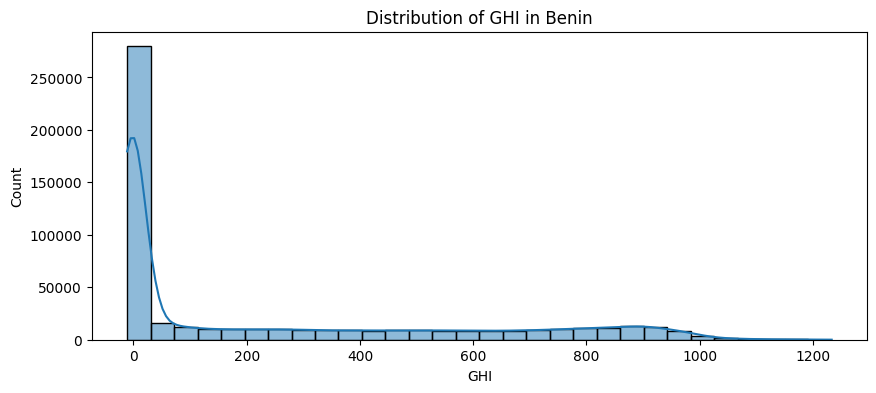

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Global Horizontal Irradiance (GHI)
plt.figure(figsize=(10, 4))
sns.histplot(df_clean['GHI'], bins=30, kde=True)
plt.title('Distribution of GHI in Benin')
plt.show()


In [23]:
#Time series analysis (if the data has dates

<Axes: title={'center': 'GHI Over Time'}, xlabel='Timestamp'>

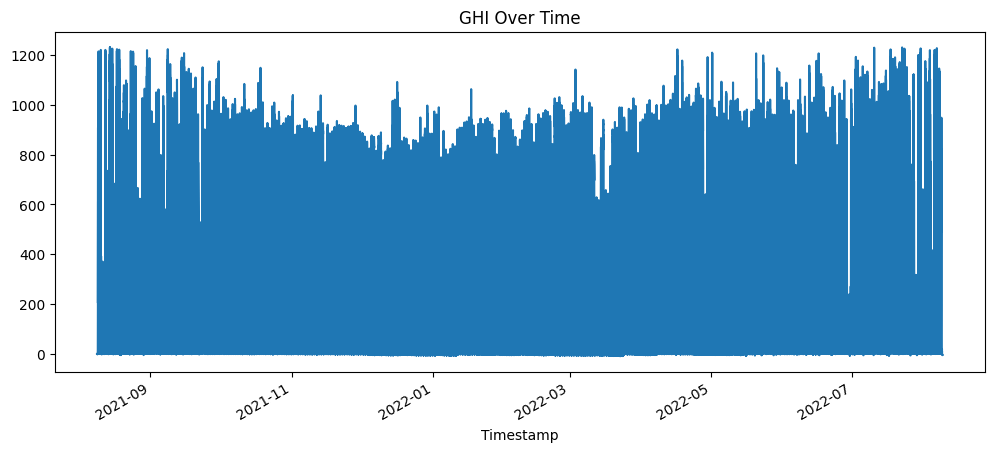

In [24]:
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])  # adjust column name if needed
df_clean.set_index('Timestamp', inplace=True)
df_clean['GHI'].plot(figsize=(12, 5), title='GHI Over Time')


In [25]:
#Correlation matrix

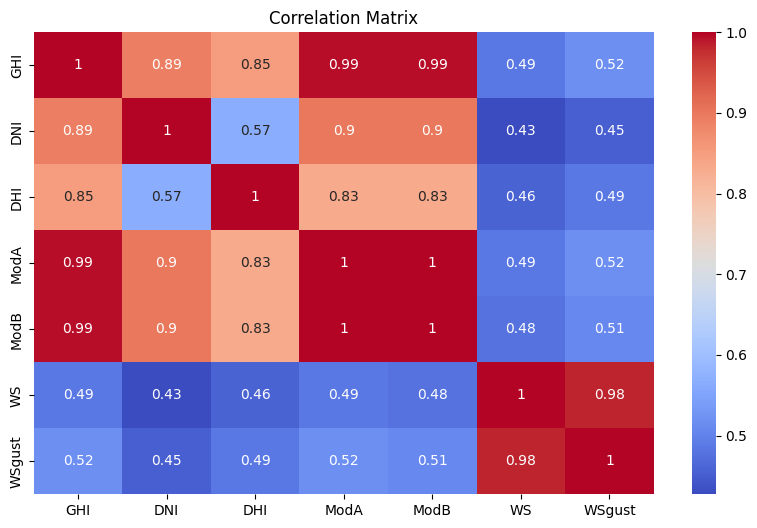

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[cols_to_check].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [27]:
print(df_clean.columns)

Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments', 'GHI_z', 'DNI_z', 'DHI_z', 'ModA_z', 'ModB_z',
       'WS_z', 'WSgust_z'],
      dtype='object')
